#### AUTHOR - NITIN KHANDARE      REG-NO. 17225760037     DATA SCIENCE      MANIPAL PROLEARN

### Indian Equities Adjusted End of Day Prices

#### This Notebook is a sort of tutorial for the beginners in Deep Learning and time-series data analysis.

#### The aim is just to show how to build the simplest Long Short-Term Memory (LSTM) recurrent neural network for the data.

In [1]:
# Let`s import all packages that we may need:

import sys 
import numpy as np # linear algebra
from scipy.stats import randint
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv), data manipulation as in SQL
import matplotlib.pyplot as plt # this is used for the plot the graph 
import seaborn as sns # used for plot interactive graph. 
from sklearn.model_selection import train_test_split # to split the data into two parts

#from sklearn.cross_validation import KFold # use for cross validation
from sklearn.preprocessing import StandardScaler # for normalization
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline # pipeline making
from sklearn.model_selection import cross_val_score
from sklearn.feature_selection import SelectFromModel
from sklearn import metrics # for the check the error and accuracy of the model
from sklearn.metrics import mean_squared_error,r2_score

## for Deep-learing:

import keras
from keras.layers import Dense
from keras.models import Sequential
from keras.utils import to_categorical
from keras.optimizers import SGD 
from keras.callbacks import EarlyStopping
from keras.utils import np_utils
import itertools
from keras.layers import LSTM
from keras.layers.convolutional import Conv1D
from keras.layers.convolutional import MaxPooling1D
from keras.layers import Dropout
import quandl

Using TensorFlow backend.


### 1. Oil & Natural Gas Corporation Ltd - Adjusted Pricing

In [4]:
BajajElect = quandl.get("XBOM/500031", authtoken="gmN2xKGChq4zRr3b7wNm",parse_dates={'dt' : ['Date', 'Time']}, infer_datetime_format=True, 
                 low_memory=False, na_values=['nan','?'], index_col='dt')

In [3]:
BajajElect.reset_index(inplace = True)

In [5]:
BajajElect.head()

,Open,High,Low,Close,Volume,Adjustment Factor,Adjustment Type
Date,,,,,,,
2007-01-02,39.916862,40.094772,38.879779,39.218241,28000.0,NaN,NaN
2007-01-03,38.714887,40.181557,38.714887,40.021004,30480.0,NaN,NaN
2007-01-04,40.615483,40.702268,39.400490,40.541716,10260.0,NaN,NaN
2007-01-05,40.268342,40.355128,39.053349,39.812720,21430.0,NaN,NaN
2007-01-08,40.355128,43.045469,40.103450,42.160260,59870.0,NaN,NaN


In [6]:
BajajElect.tail()

,Open,High,Low,Close,Volume,Adjustment Factor,Adjustment Type
Date,,,,,,,
2018-11-26,471.00,471.00,459.05,462.05,13493.0,NaN,NaN
2018-11-27,458.65,460.80,451.00,455.60,12365.0,NaN,NaN
2018-11-28,461.35,473.00,455.70,471.00,27896.0,NaN,NaN
2018-11-29,470.95,477.80,469.65,472.25,16843.0,NaN,NaN
2018-11-30,471.80,483.75,468.90,471.90,21052.0,NaN,NaN


In [ ]:
BajajElect.Date = pd.to_datetime(BajajElect.Date)

In [8]:
## finding all columns that have nan:

droping_list_all=[]
for j in range(0,7):
    if not BajajElect.iloc[:, j].notnull().all():
        droping_list_all.append(j)        
        #print(df.iloc[:,j].unique())
droping_list_all

[5, 6]

In [9]:
# filling nan with mean in any columns

for j in range(0,7):        
        BajajElect.iloc[:,j]=BajajElect.iloc[:,j].fillna(BajajElect.iloc[:,j].mean())

In [10]:
# another sanity check to make sure that there are not more any nan
BajajElect.isnull().sum()

Open                 0
High                 0
Low                  0
Close                0
Volume               0
Adjustment Factor    0
Adjustment Type      0
dtype: int64

### Data visualization

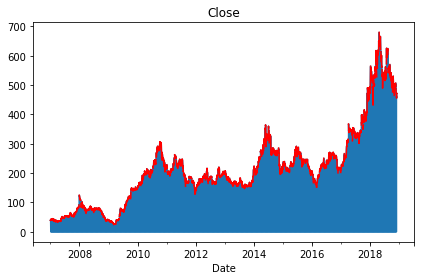

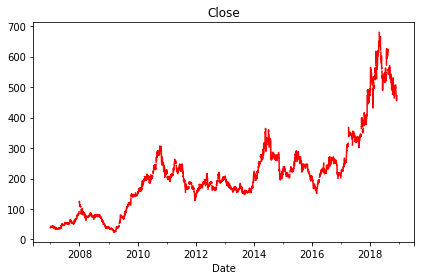

In [11]:
BajajElect.Close.resample('D').sum().plot(title='Close') 
BajajElect.Close.resample('D').mean().plot(title='Close', color='red') 
plt.tight_layout()
plt.show()   

BajajElect.Close.resample('D').mean().plot(title='Close', color='red') 
plt.tight_layout()
plt.show()

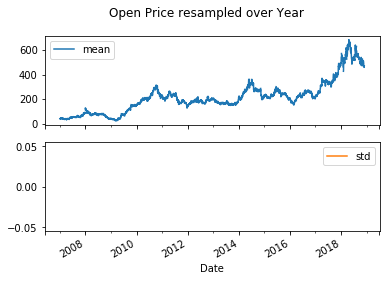

In [12]:
### Below I show mean and std of 'Global_intensity' resampled over day 
r = BajajElect.Open.resample('D').agg(['mean', 'std'])
r.plot(subplots = True, title='Open Price resampled over Year')
plt.show()

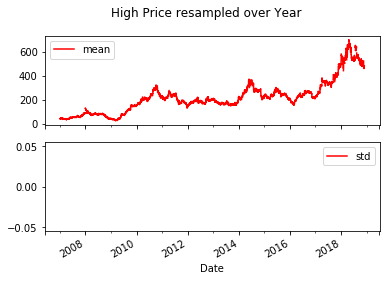

In [13]:
### Below I show mean and std of 'BajajElect High Price' resampled over day
r2 = BajajElect.High.resample('D').agg(['mean', 'std'])
r2.plot(subplots = True, title='High Price resampled over Year', color='red')
plt.show()

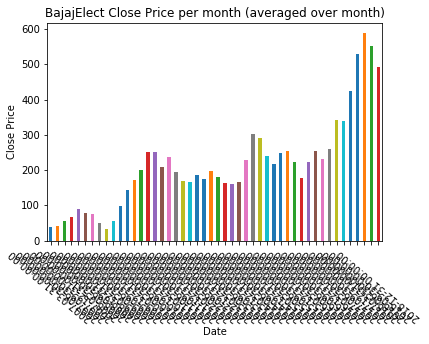

In [14]:
### Sum of 'BajajElect Close Price resampled over month

BajajElect['Close'].resample('Q').mean().plot(kind='bar')
plt.xticks(rotation=500)
plt.ylabel('Close Price')
plt.title('BajajElect Close Price per month (averaged over month)')
plt.show()

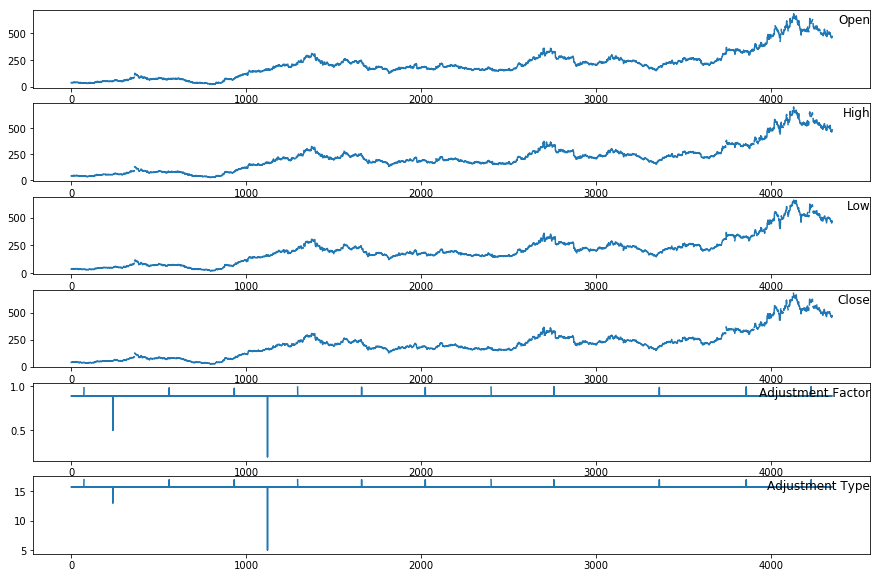

In [15]:
# Below I compare the mean of different featuresresampled over day. 
# specify columns to plot
cols = [0, 1, 2, 3, 5, 6]
i = 1
groups=cols
values = BajajElect.resample('D').mean().values
# plot each column
plt.figure(figsize=(15, 10))
for group in groups:
	plt.subplot(len(cols), 1, i)
	plt.plot(values[:, group])
	plt.title(BajajElect.columns[group], y=0.75, loc='right')
	i += 1
plt.show()

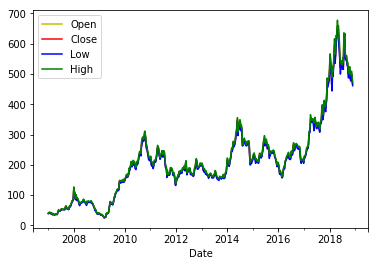

In [16]:
## resampling over Year and computing mean
BajajElect.Open.resample('W').mean().plot(color='y', legend=True)
BajajElect.Close.resample('W').mean().plot(color='r', legend=True)
BajajElect.Low.resample('W').mean().plot(color='b', legend=True)
BajajElect.High.resample('W').mean().plot(color='g', legend=True)
plt.show()

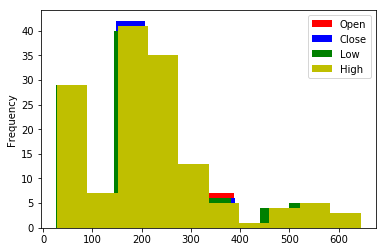

In [17]:
# Below I show hist plot of the mean of different feature resampled over month 
BajajElect.Open.resample('M').mean().plot(kind='hist', color='r', legend=True )
BajajElect.Close.resample('M').mean().plot(kind='hist',color='b', legend=True)
#df.Voltage.resample('M').sum().plot(kind='hist',color='g', legend=True)
BajajElect.Low.resample('M').mean().plot(kind='hist', color='g', legend=True)
BajajElect.High.resample('M').mean().plot(kind='hist', color='y', legend=True)
plt.show()

C:\Users\NitinKhandare\AppData\Local\Continuum\anaconda3\envs\ANN\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


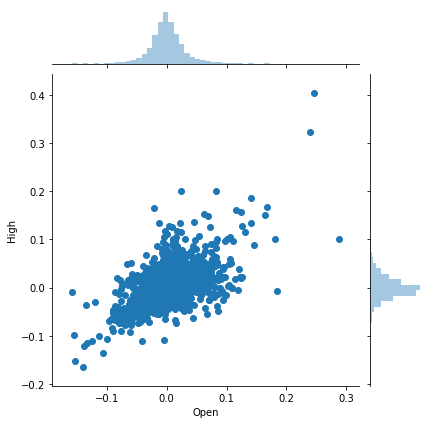

In [18]:
## The correlations between 'Global_intensity', 'Global_active_power'
data_returns = BajajElect.pct_change()
sns.jointplot(x='Open', y='High', data=data_returns)  

plt.show()

In [19]:
def series_to_supervised(data, n_in=1, n_out=1, dropnan=True):
	n_vars = 1 if type(data) is list else data.shape[1]
	dff = pd.DataFrame(data)
	cols, names = list(), list()
	# input sequence (t-n, ... t-1)
	for i in range(n_in, 0, -1):
		cols.append(dff.shift(i))
		names += [('var%d(t-%d)' % (j+1, i)) for j in range(n_vars)]
	# forecast sequence (t, t+1, ... t+n)
	for i in range(0, n_out):
		cols.append(dff.shift(-i))
		if i == 0:
			names += [('var%d(t)' % (j+1)) for j in range(n_vars)]
		else:
			names += [('var%d(t+%d)' % (j+1, i)) for j in range(n_vars)]
	# put it all together
	agg = pd.concat(cols, axis=1)
	agg.columns = names
	# drop rows with NaN values
	if dropnan:
		agg.dropna(inplace=True)
	return agg

In [20]:
## resampling of data over hour
df_resample = BajajElect.resample('d').mean() 
df_resample.shape

(4351, 7)

In [21]:
## * Note: I scale all features in range of [0,1].

## If you would like to train based on the resampled data (over hour), then used below
values = df_resample.values 


## full data without resampling
#values = df.values

# integer encode direction
# ensure all data is float
#values = values.astype('float32')
# normalize features
scaler = MinMaxScaler(feature_range=(0, 1))
scaled = scaler.fit_transform(values)
# frame as supervised learning
reframed = series_to_supervised(scaled, 1, 1)

# drop columns we don't want to predict
reframed.drop(reframed.columns[[8,9,10,11,12,13]], axis=1, inplace=True)
print(reframed.head())

   var1(t-1)  var2(t-1)  var3(t-1)  var4(t-1)  var5(t-1)  var6(t-1)  \
1   0.023323   0.022075   0.023031   0.021498   0.003636   0.866215   
2   0.021502   0.022203   0.022770   0.022725   0.003958   0.866215   
3   0.024381   0.022972   0.023855   0.023521   0.001332   0.866215   
7   0.023987   0.026432   0.024967   0.025993   0.007775   0.866215   
8   0.025958   0.025663   0.024679   0.025602   0.003800   0.866215   

   var7(t-1)   var1(t)  
1   0.897436  0.021502  
2   0.897436  0.024381  
3   0.897436  0.023855  
7   0.897436  0.025958  
8   0.897436  0.026346  


### Splitting the rest of data to train and validation sets

#### First, I split the prepared dataset into train and test sets. To speed up the training of the model (for the sake of the demonstration), we will only train the model on the first year of data, then evaluate it on the next 3 years of data.

In [22]:
# split into train and test sets
values = reframed.values

n_train_time = 365
train = values[:n_train_time, :]
test = values[n_train_time:, :]
##test = values[n_train_time:n_test_time, :]
# split into input and outputs
train_X, train_y = train[:, :-1], train[:, -1]
test_X, test_y = test[:, :-1], test[:, -1]
# reshape input to be 3D [samples, timesteps, features]
train_X = train_X.reshape((train_X.shape[0], 1, train_X.shape[1]))
test_X = test_X.reshape((test_X.shape[0], 1, test_X.shape[1]))
print(train_X.shape, train_y.shape, test_X.shape, test_y.shape) 
# We reshaped the input into the 3D format as expected by LSTMs, namely [samples, timesteps, features].

(365, 1, 7) (365,) (2122, 1, 7) (2122,)


### Model architecture

##### 1) LSTM with 100 neurons in the first visible layer
##### 3) dropout 20%
##### 4) 1 neuron in the output layer for predicting Global_active_power.
##### 5) The input shape will be 1 time step with 7 features.
##### 6) I use the Mean Absolute Error (MAE) loss function and the efficient Adam version of stochastic gradient descent.
##### 7) The model will be fit for 20 training epochs with a batch size of 70.

Train on 365 samples, validate on 2122 samples
Epoch 1/250
 - 1s - loss: 0.0026 - val_loss: 0.0942
Epoch 2/250
 - 0s - loss: 9.3894e-04 - val_loss: 0.0748
Epoch 3/250
 - 0s - loss: 0.0017 - val_loss: 0.0788
Epoch 4/250
 - 0s - loss: 0.0012 - val_loss: 0.0858
Epoch 5/250
 - 0s - loss: 0.0012 - val_loss: 0.0836
Epoch 6/250
 - 0s - loss: 9.0029e-04 - val_loss: 0.0739
Epoch 7/250
 - 0s - loss: 8.0678e-04 - val_loss: 0.0649
Epoch 8/250
 - 0s - loss: 9.0894e-04 - val_loss: 0.0605
Epoch 9/250
 - 0s - loss: 8.6970e-04 - val_loss: 0.0593
Epoch 10/250
 - 0s - loss: 7.6006e-04 - val_loss: 0.0567
Epoch 11/250
 - 0s - loss: 7.0111e-04 - val_loss: 0.0519
Epoch 12/250
 - 0s - loss: 7.4119e-04 - val_loss: 0.0463
Epoch 13/250
 - 0s - loss: 6.9519e-04 - val_loss: 0.0423
Epoch 14/250
 - 0s - loss: 6.0256e-04 - val_loss: 0.0398
Epoch 15/250
 - 0s - loss: 6.3853e-04 - val_loss: 0.0375
Epoch 16/250
 - 0s - loss: 4.9533e-04 - val_loss: 0.0335
Epoch 17/250
 - 0s - loss: 4.8982e-04 - val_loss: 0.0303
Epoch 18/

Epoch 137/250
 - 0s - loss: 2.9559e-05 - val_loss: 6.5401e-05
Epoch 138/250
 - 0s - loss: 2.3928e-05 - val_loss: 6.0464e-05
Epoch 139/250
 - 0s - loss: 3.0665e-05 - val_loss: 6.1200e-05
Epoch 140/250
 - 0s - loss: 2.6384e-05 - val_loss: 6.7488e-05
Epoch 141/250
 - 0s - loss: 2.6574e-05 - val_loss: 5.9855e-05
Epoch 142/250
 - 0s - loss: 2.7720e-05 - val_loss: 7.0571e-05
Epoch 143/250
 - 0s - loss: 2.7610e-05 - val_loss: 6.4864e-05
Epoch 144/250
 - 0s - loss: 2.5118e-05 - val_loss: 5.6468e-05
Epoch 145/250
 - 0s - loss: 2.8047e-05 - val_loss: 6.3828e-05
Epoch 146/250
 - 0s - loss: 2.8833e-05 - val_loss: 5.3706e-05
Epoch 147/250
 - 0s - loss: 2.5020e-05 - val_loss: 5.7195e-05
Epoch 148/250
 - 0s - loss: 2.4797e-05 - val_loss: 5.5224e-05
Epoch 149/250
 - 0s - loss: 3.0829e-05 - val_loss: 5.3780e-05
Epoch 150/250
 - 0s - loss: 2.8523e-05 - val_loss: 5.5792e-05
Epoch 151/250
 - 0s - loss: 2.9551e-05 - val_loss: 6.0208e-05
Epoch 152/250
 - 0s - loss: 2.7163e-05 - val_loss: 5.5626e-05
Epoch 15

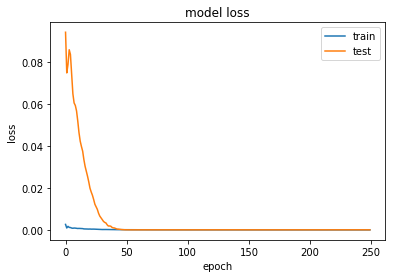

Test RMSE: 4.92250


In [23]:
model = Sequential()
model.add(LSTM(100, input_shape=(train_X.shape[1], train_X.shape[2])))
model.add(Dropout(0.2))
#model.add(LSTM(70))
#model.add(Dropout(0.3))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')



# fit network
history = model.fit(train_X, train_y, epochs=250, batch_size=70, validation_data=(test_X, test_y), verbose=2, shuffle=False)

# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()

# make a prediction
yhat = model.predict(test_X)
test_X = test_X.reshape((test_X.shape[0], 7))
# invert scaling for forecast
inv_yhat = np.concatenate((yhat, test_X[:, -6:]), axis=1)
inv_yhat = scaler.inverse_transform(inv_yhat)
inv_yhat = inv_yhat[:,0]
# invert scaling for actual
test_y = test_y.reshape((len(test_y), 1))
inv_y = np.concatenate((test_y, test_X[:, -6:]), axis=1)
inv_y = scaler.inverse_transform(inv_y)
inv_y = inv_y[:,0]
# calculate RMSE
rmse = np.sqrt(mean_squared_error(inv_y, inv_yhat))
print('Test RMSE: %.5f' % rmse)

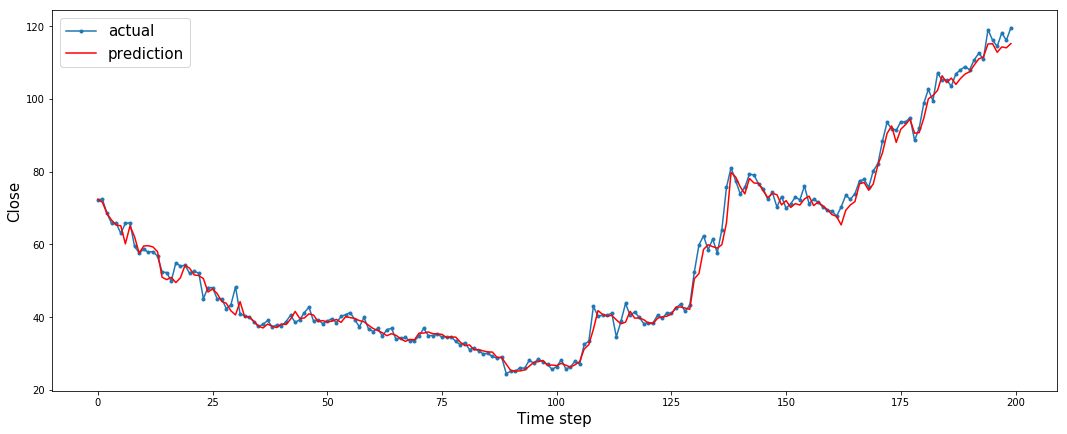

In [28]:
## time steps, every step is one hour (you can easily convert the time step to the actual time index)
## for a demonstration purpose, I only compare the predictions in 200 hours. 

aa=[x for x in range(200)]
plt.figure(figsize = (18,7))
plt.plot(aa, inv_y[:200], marker='.', label="actual")
plt.plot(aa, inv_yhat[:200], 'r', label="prediction")
plt.ylabel('Close', size=15)
plt.xlabel('Time step', size=15)
plt.legend(fontsize=15)
plt.show()

In [ ]:
### Now let's see what sort of data we have. You want data with various patterns occurring over time.

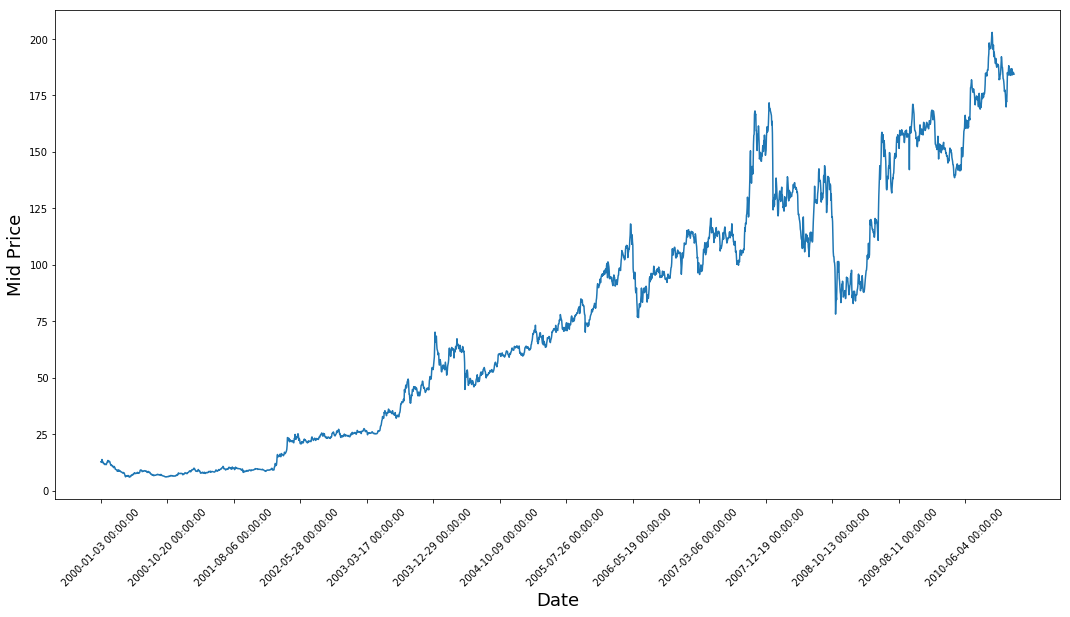

In [13]:
plt.figure(figsize = (18,9))
plt.plot(range(ONGC.shape[0]),(ONGC['Low Price']+ONGC['High Price'])/2.0)
plt.xticks(range(0,ONGC.shape[0],200),ONGC['Date'].loc[::200],rotation=45)
plt.xlabel('Date',fontsize=18)
plt.ylabel('Mid Price',fontsize=18)
plt.show()

### 2. ITC Ltd - Adjusted Pricing

In [30]:
ITC = quandl.get("TC1/ITC", authtoken="gmN2xKGChq4zRr3b7wNm")

ITC.reset_index(inplace = True)

In [29]:
ITC.head()

,Date,Open Price,High Price,Low Price,Last Traded Price,Close Price,Total Traded Quantity,Turnover (in Lakhs)
2743,2010-12-27,102.93,103.84,102.51,102.72,102.93,7613802.78,7867.57
2744,2010-12-28,102.93,104.17,102.93,103.84,103.81,4743778.16,4909.96
2745,2010-12-29,103.81,105.87,103.79,105.33,105.63,11226425.45,11784.04
2746,2010-12-30,105.09,106.93,104.69,105.14,105.84,32428776.47,34415.30
2747,2010-12-31,105.42,106.69,105.29,106.12,105.90,11445904.91,12130.63


In [8]:
ITC.tail()

### 3. Hindustan Unilever Ltd - Adjusted Pricing

In [7]:
HINDUNILVR = quandl.get("TC1/HINDUNILVR", authtoken="gmN2xKGChq4zRr3b7wNm")

HINDUNILVR.head()

,Open Price,High Price,Low Price,Last Traded Price,Close Price,Total Traded Quantity,Turnover (in Lakhs)
Date,,,,,,,
2000-01-03,149.90,150.38,149.90,150.38,150.38,382114.10,574.53
2000-01-04,155.17,155.17,146.64,147.94,148.66,897844.63,1344.74
2000-01-05,143.38,146.64,137.18,142.30,143.37,1232069.80,1775.48
2000-01-06,145.00,153.81,144.03,149.90,149.12,2915869.89,4374.16
2000-01-07,149.90,159.80,148.74,156.09,157.26,2954997.35,4583.92


In [9]:
HINDUNILVR.reset_index(inplace = True)

### 4. HDFC Bank Ltd - Adjusted Pricing

In [11]:
HDFCBANK = quandl.get("TC1/HDFCBANK", authtoken="gmN2xKGChq4zRr3b7wNm")

HDFCBANK.head()

,Open Price,High Price,Low Price,Last Traded Price,Close Price,Total Traded Quantity,Turnover (in Lakhs)
Date,,,,,,,
2000-01-03,29.44,30.14,29.44,30.14,30.14,187563.22,56.38
2000-01-04,32.28,32.53,30.32,30.86,30.82,951435.41,295.23
2000-01-05,30.14,30.84,29.26,29.79,29.61,901300.50,270.41
2000-01-06,29.79,30.14,29.31,29.95,29.85,479501.79,143.22
2000-01-07,28.75,30.32,28.75,30.28,29.86,480167.25,142.02


In [23]:
HDFCBANK.reset_index(inplace = True)

### 5. Sun Pharmaceutical Industries Ltd - Adjusted Pricing

In [16]:
SUNPHARMA = quandl.get("TC1/SUNPHARMA", authtoken="gmN2xKGChq4zRr3b7wNm")

In [14]:
SUNPHARMA.reset_index(inplace = True)

In [15]:
SUNPHARMA.head()

,Date,Open Price,High Price,Low Price,Last Traded Price,Close Price,Total Traded Quantity,Turnover (in Lakhs)
0,2000-01-03,12.56,12.81,12.28,12.81,12.81,433286.97,55.22
1,2000-01-04,13.68,13.68,12.30,12.64,12.64,829177.15,104.51
2,2000-01-05,12.88,12.88,12.14,12.18,12.19,874741.06,107.86
3,2000-01-06,12.21,12.53,12.11,12.20,12.18,497477.64,60.74
4,2000-01-07,11.90,11.90,11.21,11.21,11.21,591041.26,66.89


In [17]:
SUNPHARMA.shape

(2748, 7)

In [18]:
SUNPHARMA.describe()

,Open Price,High Price,Low Price,Last Traded Price,Close Price,Total Traded Quantity,Turnover (in Lakhs)
count,2748.000000,2748.000000,2748.000000,2748.000000,2748.00000,2.748000e+03,2748.000000
mean,65.750262,66.990571,64.442791,65.719174,65.73758,1.878785e+06,1489.121339
std,55.026497,55.933352,54.071574,54.990483,55.01084,1.874114e+06,2143.911473
min,6.600000,7.600000,5.990000,6.800000,6.80000,1.242511e+04,1.480000
25%,12.842500,13.100000,12.580000,12.800000,12.77750,7.626676e+05,180.080000
50%,48.875000,49.525000,47.755000,48.810000,48.80000,1.395497e+06,582.795000
75%,104.810000,106.920000,102.240000,104.865000,104.75500,2.337885e+06,2068.592500
max,237.770000,240.020000,234.850000,237.670000,237.74000,3.002927e+07,32601.710000


In [20]:
SUNPHARMA.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2748 entries, 2000-01-03 to 2010-12-31
Data columns (total 7 columns):
Open Price               2748 non-null float64
High Price               2748 non-null float64
Low Price                2748 non-null float64
Last Traded Price        2748 non-null float64
Close Price              2748 non-null float64
Total Traded Quantity    2748 non-null float64
Turnover (in Lakhs)      2748 non-null float64
dtypes: float64(7)
memory usage: 171.8 KB


In [22]:
SUNPHARMA.isnull().sum()

Open Price               0
High Price               0
Low Price                0
Last Traded Price        0
Close Price              0
Total Traded Quantity    0
Turnover (in Lakhs)      0
dtype: int64